**Group Members**

Syed Zain Haider 24020294

Muhammad Huzail 24020471



**Title: Data Science Job Salaries: A Machine Learning Approach**

**Introduction:**

Why are we doing it:

Our topic is important for the people who are targeting the roles in data sciences field, as it will help them to understand the salaries and will help them to not keep their expectations too high or low. It will also help them to target the jobs which best suit their interests. And can also help them regarding which courses to study to target their fields.

Our research is also important for employers, as they will know that for a specific post how much salary should they pay (accordin to expectations of job seekers). This will help them to get qualified applicants for jobs. It will also help them in investing in specifics for their employees.

**Brief Literature Review:**

A lot of studies has been done on predicting salaries in different fields but they have mainly focused on traditional fields. Our study aims towards the gaps in this area as data scientists jobs are relatively new and work on them is relatively less.

Our study builds upon this existing literature by focusing on the rapidly growing field of Data Science patricularly working with and considering job-specific factors, like experiences and job location. It will use multiple machine learning algorithms, and optimize them to deliver the most accurate predictions.

**Data Source:**

We used a Kaggle's dataset that contains data for 607 employees from different companies, locations, and information about the position, such as experience level, job title and employment type.There are 11 attributes in our dataset in total, which are listed and explained below:  

**Target Variable:**

Salary_in_usd

**Input Variables:**

work_year:	The year the salary was paid.


experience_level:	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director


employment_type:	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance


job_title:	The role worked in during the year.


salary:	The total gross salary amount paid.


salary_currency:	The currency of the salary paid as an ISO 4217 currency code.


employee_residence:	Employee's primary country of residence in during the work year as an ISO 3166 country code.


remote_ratio:	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)


company_location:	The country of the employer's main office or contracting branch as an ISO 3166 country code.


company_size:	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

**Objective:**

The data set gives us a wide variety of questions to answer through our analysis of this dataset. Some questions we initially started off with are:

a) Identifying which factors most affect data science salaries.

b) How different regions have varying data science salaries.

c) What salary an employee should expect based on their experience level?

The objective of this project is to use machine learning algorithms to predict data science salaries based on different job characteristics.



**Data Exploration and Cleaning**

Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import pandas as pd
%cd '/gdrive/MyDrive/LUMS/Spring 24/ML for SS/Project/'
df = pd.read_csv('ds_salaries.csv')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/LUMS/Spring 24/ML for SS/Project


Initial Inspection

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


We find the shape of the data to see the number of observations and varibales.

In [ ]:
print('Shape of the dataframe:', df.shape)
print('\nData types of the columns:')
print(df.dtypes)

Shape of the dataframe: (607, 12)

Data types of the columns:
Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


**Data Cleaning: **

After getting to know about the data, it's the time to clean it. We will be dropping column "unnamed" as it's of no use.
Dropping Columns

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

Dropping Duplicates:

We checked if there are any duplicates in our data set and we removed them to not get any problem with that.

In [ ]:
duplicates = df.duplicated().sum()

if duplicates > 0:
    df.drop_duplicates(inplace=True)

duplicates_after_cleaning = df.duplicated().sum()

duplicates, duplicates_after_cleaning

(42, 0)

Handling Outliers in salary_in_usd:

Handling outliers is important as we want to be sure that they donot effect the results of our machine learning model.

In [ ]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]

df.loc[df['salary_in_usd'] < lower_bound, 'salary_in_usd'] = lower_bound
df.loc[df['salary_in_usd'] > upper_bound, 'salary_in_usd'] = upper_bound

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L


Encoding Categorical Variables:

Encoding is the necessary step as as our model requires numerical input features to perform computations. Now we encode our variables.

In [ ]:
experience_level_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['experience_level'] = df['experience_level'].map(experience_level_mapping)

company_size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_encoded'] = df['company_size'].map(company_size_mapping)

employment_type_dummies = pd.get_dummies(df['employment_type'], prefix='employment_type')

df = pd.concat([df, employment_type_dummies], axis=1)

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_encoded,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2020,2,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L,3,False,False,True,False
1,2020,3,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S,1,False,False,True,False
2,2020,3,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M,2,False,False,True,False
3,2020,2,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S,1,False,False,True,False
4,2020,3,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L,3,False,False,True,False


Now Categorizing the variable remote category from our data set

In [ ]:
df['remote_category'] = pd.cut(df['remote_ratio'], bins=[-1, 20, 80, 100], labels=['No Remote', 'Partially Remote', 'Fully Remote'])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_encoded,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_category
0,2020,2,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L,3,False,False,True,False,No Remote
1,2020,3,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S,1,False,False,True,False,No Remote
2,2020,3,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M,2,False,False,True,False,Partially Remote
3,2020,2,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S,1,False,False,True,False,No Remote
4,2020,3,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L,3,False,False,True,False,Partially Remote


**Exploratory Data Analysis (EDA)**

Descriptive Statistics

To understand the data well, we see summary stats of every variable in data set.

In [ ]:
descriptive_stats = df['salary_in_usd'].describe()
df.describe()


,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size_encoded,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
count,565.000000,565.000000,5.650000e+02,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,2021.364602,2.366372,3.381160e+05,108227.414159,69.911504,2.196460,0.008850,0.007080,0.966372,0.017699
std,0.698138,0.798004,1.599879e+06,63038.978857,40.900666,0.670018,0.093738,0.083917,0.180430,0.131972
min,2020.000000,1.000000,4.000000e+03,2859.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,6.700000e+04,60757.000000,50.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,2021.000000,2.000000,1.109250e+05,100000.000000,100.000000,2.000000,0.000000,0.000000,1.000000,0.000000
75%,2022.000000,3.000000,1.650000e+05,150000.000000,100.000000,3.000000,0.000000,0.000000,1.000000,0.000000
max,2022.000000,4.000000,3.040000e+07,283864.500000,100.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Distribution of Salaries

To check the distribution of the salary_in_usd across the entire data set, we plotted a histogram.

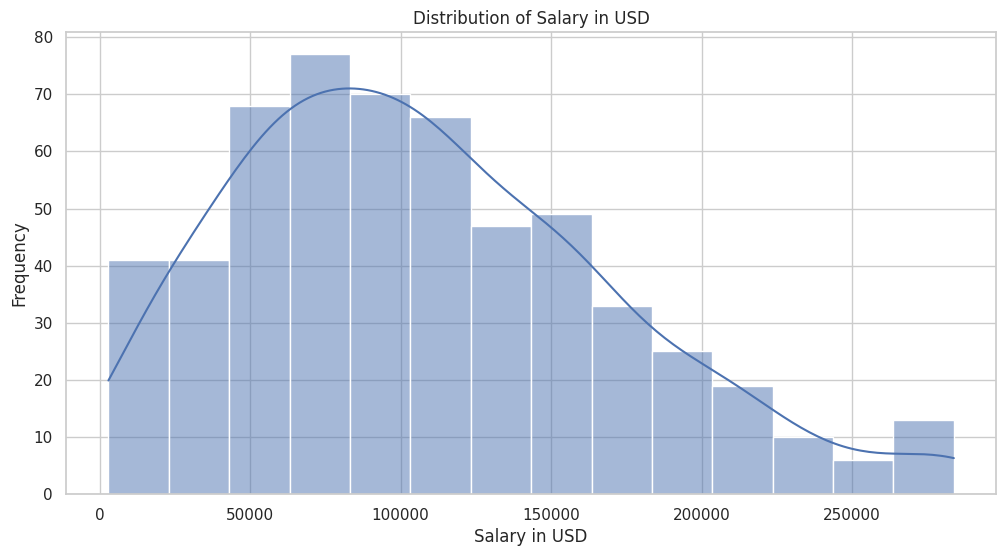

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

Box Plot Visualizations

To analyze the distribution of salary_in_usd by experience level, we created a
boxplot visualization. The purpose of this visualization was to gain insights into the salary variations and identify any outliers with job expereince.

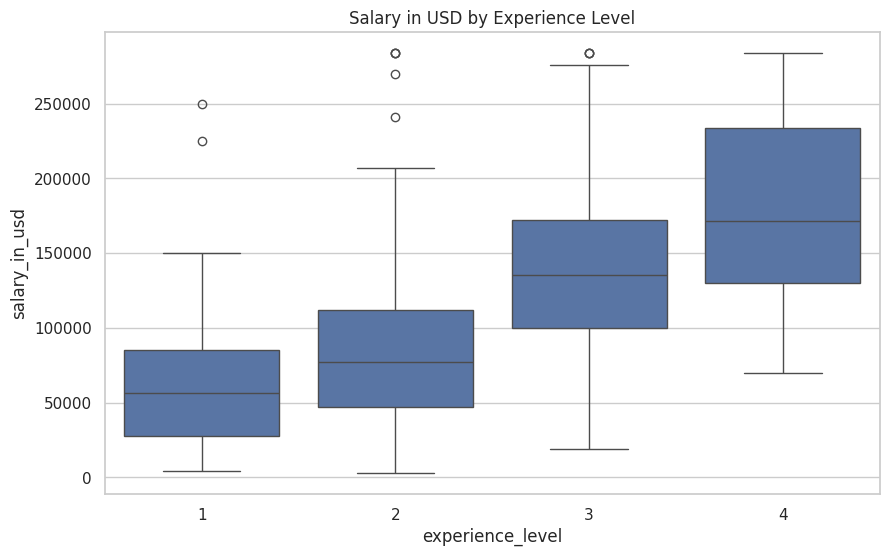

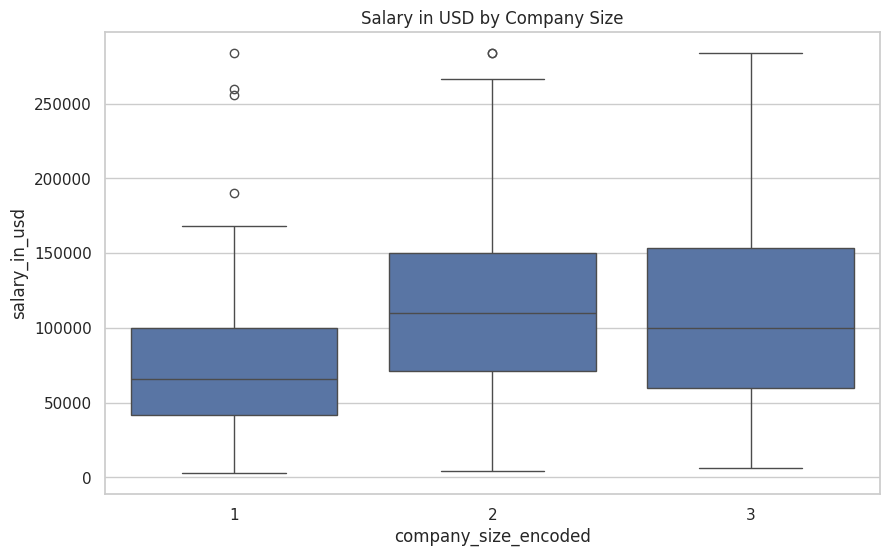

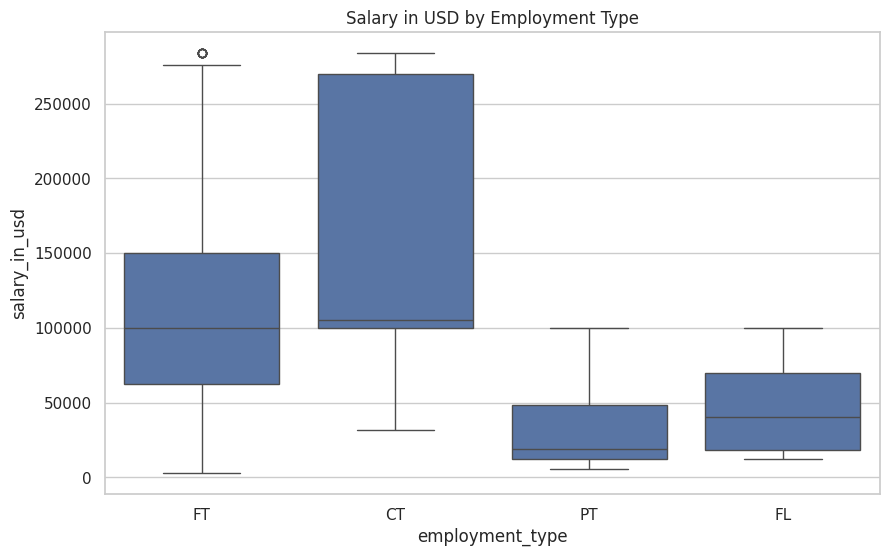

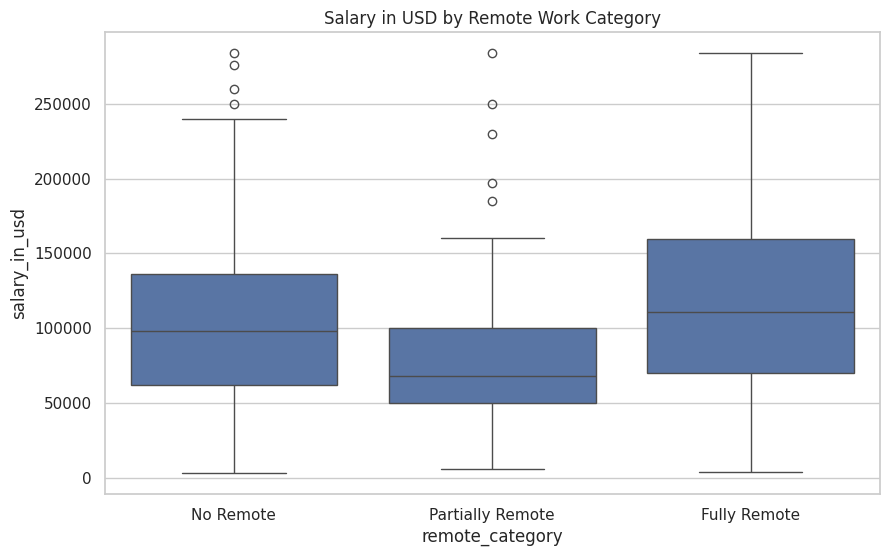

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary in USD by Experience Level')
plt.show()

#To analyze the relationship between company size and salary_in_usd, we generated a boxplot.
#The objective was to gain insights into the salary distribution in different company sizes.

plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size_encoded', y='salary_in_usd', data=df)
plt.title('Salary in USD by Company Size')
plt.show()

#To analyze the relationship between employment type and salary_in_usd, we generated a boxplot.
#The objective is to get to know hoe much employment type effect salary_in_usd

plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary in USD by Employment Type')
plt.show()

#this boxplot shows relationship between remote/partially-remote/no-remote jobs with salary_in_usd.

plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_category', y='salary_in_usd', data=df)
plt.title('Salary in USD by Remote Work Category')
plt.show()

Histograms for all numerical columns

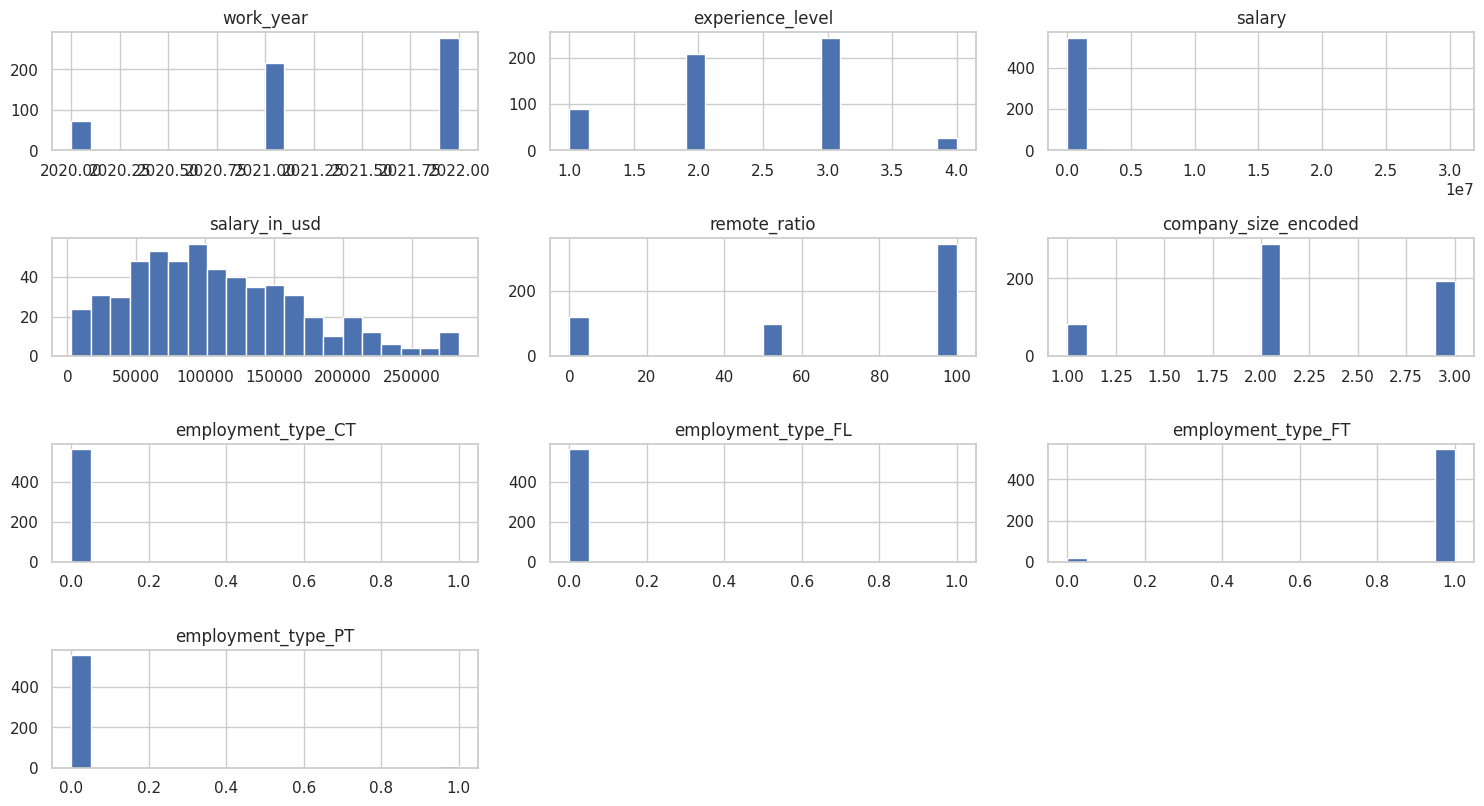

In [ ]:
df.hist(figsize=(15, 10), bins=20, layout=(5, 3))
plt.tight_layout()
plt.show()

Correlation Matrix

Correlation Matrix provide us different insights of relationship between different variables.

<ipython-input-24-de7a6e712358>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


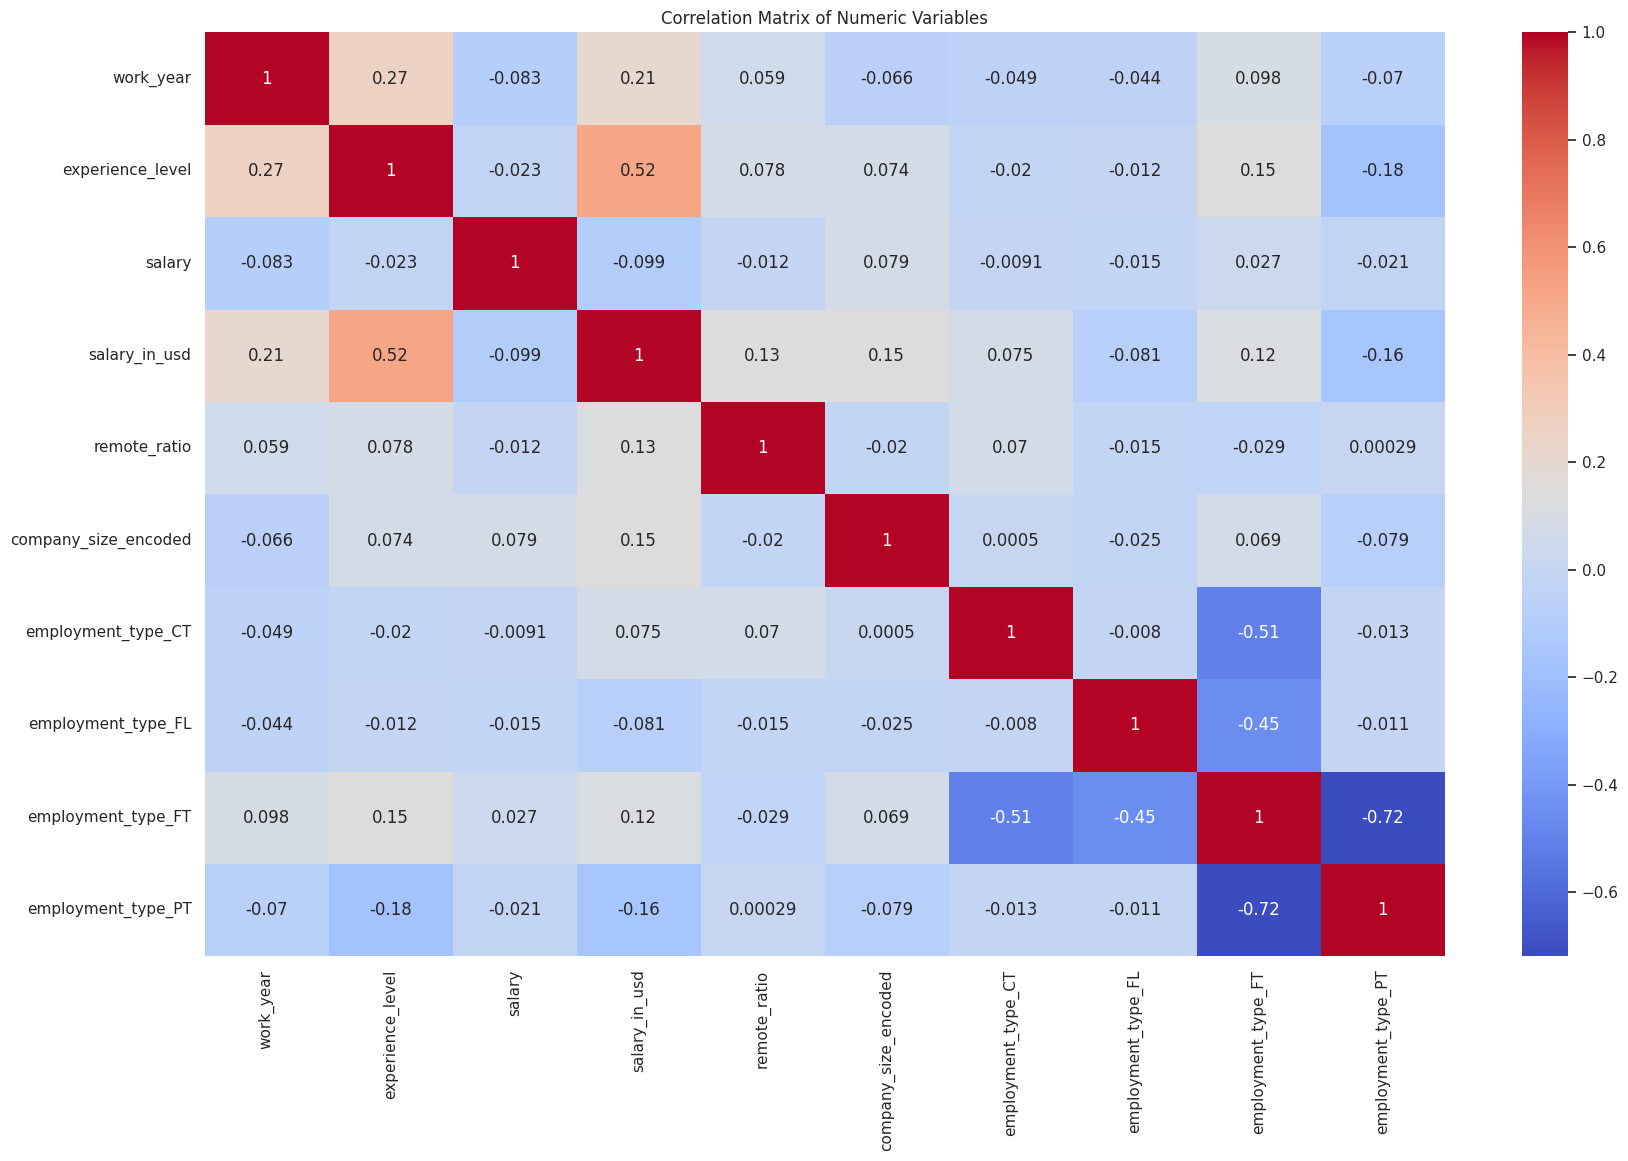

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


The correlation values are mostly low, suggesting weak relationships between the variables. The highest correlation, at 0.52, is between salary in USD and experience level, indicating a moderate positive relationship; this implies that higher experience levels often correlate with higher salaries. Additionally, company size and full-time employment show correlations with salary in USD at 0.15 and 0.12, respectively. Most other correlations are close to zero, suggesting no strong relationships between those variables. Although the correlation matrix offers some insights into these pairwise relationships, the low correlation values should be approached with caution, as their statistical significance is uncertain.

**MACHINE LEARNING**

In [ ]:
# Prepare the data for modeling
X = df.drop(['salary_in_usd', 'employment_type', 'company_size'], axis=1)  # Drop non-encoded and target columns
y = df['salary_in_usd']


In [ ]:
# Preprocessing for numeric and categorical features

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_features = ['remote_ratio']
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_encoded,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_category
0,2020,2,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L,3,False,False,True,False,No Remote
1,2020,3,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S,1,False,False,True,False,No Remote
2,2020,3,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M,2,False,False,True,False,Partially Remote
3,2020,2,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S,1,False,False,True,False,No Remote
4,2020,3,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L,3,False,False,True,False,Partially Remote


Three machine learning models were deployed for prediction: Linear Regression, Decision Tree, and Random Forest. These models were trained on 80% of the data and tested on the remaining 20%.

In [ ]:
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model setup
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Evaluate models
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

# Calculating metrics
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Printing results
    print(f'{name}:')
    print(f'Training RMSE: {rmse_train}')
    print(f'Testing RMSE: {rmse_test}')
    print(f'Training MAE: {mae_train}')
    print(f'Testing MAE: {mae_test}\n')

Linear Regression:
Training RMSE: 35468.18640720295
Testing RMSE: 41294.07141202313
Training MAE: 25180.63381233021
Testing MAE: 30867.5346922424

Decision Tree:
Training RMSE: 30757.870232315403
Testing RMSE: 42207.68063458169
Training MAE: 18851.030444509186
Testing MAE: 29453.672058212705

Random Forest:
Training RMSE: 33189.004425146304
Testing RMSE: 37487.03294570556
Training MAE: 24106.438766251096
Testing MAE: 27043.667216131274



The scores from the above code are: The Root Mean Squared Error for our Linear
Regression model is 35468.18. This means that our prediction are about 35468.18 off from the actual values.

For Decision Tree, our RMSE is 30757.87, which means our prediction are out 30757.87 off from the actual values.

For Random forest, our RMSE is 33189.004, which means our prediction are out 33189.004 off from the actual values.


**Cross Validation: **

Based on these values and values of the MAE, we decided to go forward with the decision tree model and find the best parameters using GridSearchCV.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

# Define model parameter grid
param_grid = {
    'Linear Regression': {
        'model__fit_intercept': [True, False]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_features': ['auto', 'sqrt']
    }
}

In [ ]:
# Function to calculate and print metrics
def print_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')

# Models and pipelines
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Setting up cross-validation and parameter tuning
best_estimators = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='neg_root_mean_squared_error', refit=True)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_

    print(f"{name} Best Parameters:")
    print(grid_search.best_params_)
    print(f"Best cross-validation RMSE: {-grid_search.best_score_:.2f}")

    # Predict and calculate metrics using the best estimator
    y_pred = best_estimators[name].predict(X_test)
    print_metrics(y_test, y_pred)


Linear Regression Best Parameters:
{'model__fit_intercept': False}
Best cross-validation RMSE: 58978.13
RMSE: 41290.70
MAE: 30909.58
Decision Tree Best Parameters:
{'model__max_depth': 10, 'model__min_samples_leaf': 4}
Best cross-validation RMSE: 48980.93
RMSE: 40772.28
MAE: 29891.46


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Random Forest Best Parameters:
{'model__max_features': 'sqrt', 'model__n_estimators': 100}
Best cross-validation RMSE: 47018.61
RMSE: 37557.66
MAE: 28173.75


**Limitations:**

The project is subject to several limitations that impact its scope and the generalizability of its findings. Firstly, the dataset comprises only 607 observations, which significantly limits the statistical power and generalizability of the predictive models derived from it. Such a small sample size is inadequate for building robust models that can be applied broadly across different contexts. Additionally, the dataset encompasses data from various regions, which introduces another layer of complexity due to the substantial variations in data science salaries across these regions. These variations reflect diverse economic conditions, cost of living differences, and local market demands, which are factors not uniformly distributed and not sufficiently detailed in the dataset. This discrepancy makes it difficult to develop a model that accurately predicts salaries across different geographical areas. Moreover, the dataset lacks detailed explanatory variables that could potentially elucidate the complexities observed, such as specific industry sectors, professional roles, years of experience in related fields, or regional economic indicators. More granular data capturing these aspects would significantly enhance the predictive accuracy and reliability of the models. Therefore, for future improvements, it would be beneficial to obtain a larger and more detailed dataset that includes a broader set of features, which would help in creating models that are more capable of capturing the nuances and variations inherent in global data science salary structures.

**Conclusion:**

In conclusion, our attempt to build a predictive model for data science salaries based on a set of selected attributes revealed significant limitations. The results indicate that while certain factors included in our model contribute to salary predictions, there are additional, uncovered variables that significantly influence data science salaries. These unidentified factors suggest that the current model does not capture all the nuances that determine salary variations. The absence of these critical variables in our dataset limits the accuracy and applicability of our predictions, underscoring the need for a more comprehensive dataset that includes a wider range of explanatory factors. To enhance the reliability and validity of future models, it would be essential to incorporate these additional variables, which may include industry-specific data, regional economic conditions, or more detailed employment history. By addressing these gaps, we can develop a more robust model that better reflects the complexities of data science compensation and improves predictive accuracy across different scenarios and regions.

